# Linear Regression Assignment
## Chinese automobile company Geely Auto Case Study 

### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

 - Which variables are significant in predicting the price of a car
 - How well those variables describe the price of a car


Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

##### Business Goal 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 
**So interpretation is important!**

## Data Preparation & EDA


In [1]:
# Import 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm   
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns',500 )

In [2]:
carprice = pd.read_csv("D:/Learning/Machine Learning/CarPrice_Assignment.csv")

In [3]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the housing dataframe

In [4]:
carprice.shape

(205, 26)

In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Data Cleaning 
## Handling Missing Data 
round(100*(carprice.isnull().sum()/len(carprice.index)), 2).sort_values(ascending=False)
# no missing values 

price               0.0
highwaympg          0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
car_ID              0.0
dtype: float64

In [8]:
# Check for outliers 

print(carprice.quantile(1),'\n',carprice.quantile(.99))

car_ID                205.00
symboling               3.00
wheelbase             120.90
carlength             208.10
carwidth               72.30
carheight              59.80
curbweight           4066.00
enginesize            326.00
boreratio               3.94
stroke                  4.17
compressionratio       23.00
horsepower            288.00
peakrpm              6600.00
citympg                49.00
highwaympg             54.00
price               45400.00
Name: 1, dtype: float64 
 car_ID                202.960
symboling               3.000
wheelbase             115.544
carlength             202.480
carwidth               71.700
carheight              59.100
curbweight           3948.000
enginesize            302.160
boreratio               3.800
stroke                  3.900
compressionratio       23.000
horsepower            207.000
peakrpm              6000.000
citympg                44.720
highwaympg             49.880
price               40802.720
Name: 0.99, dtype: float64


In [9]:
# no significant outlier found
## FIXING SOME OF THE COLUMNS
carprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
# carprice.CarName.str.split(' ')
f = lambda x:x.split(' ')[0]
carprice['Brand']=carprice.CarName.apply(f)

In [11]:
set(carprice['Brand'].tolist())

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

In [12]:
carprice['Brand']=carprice.Brand.replace({'vw':'volkswagen','vokswagen':'volkswagen','maxda':'mazda'
                        ,'porcshce':'porsche','toyouta':'toyota'},regex=True)

In [13]:
set(carprice['Brand'].tolist())

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo'}

In [14]:
# Fixing some of the data types of columns 

####  Visualising the Data

- If there is some obvious multicollinearity going on
- identify if some predictors directly have a strong association with the outcome variable


#### Visualising Numeric Variables for EDA

Let's make a pairplot of all the numeric variables

sns.pairplot(carprice)
plt.show()

In [15]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### Visualising Categorical Variables


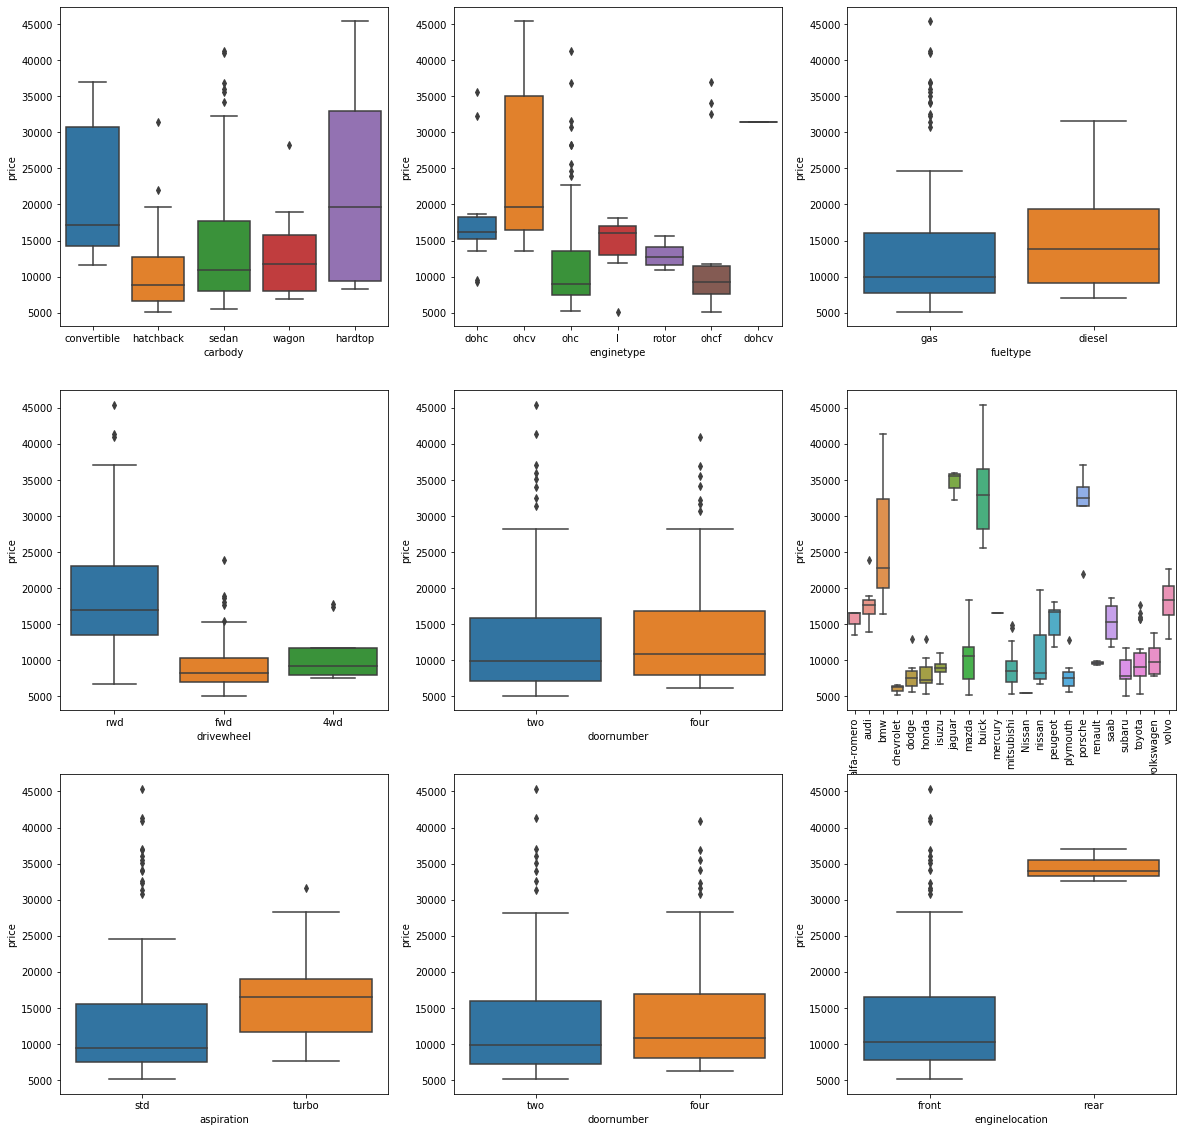

In [16]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(3,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(3,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(3,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(3,3,6)
plt.xticks(fontsize=10,rotation = 90)
sns.boxplot(x = 'Brand', y = 'price', data = carprice)
plt.subplot(3,3,7)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(3,3,8)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)

plt.show()

### Creating Dummy for Cataorical datas 

-  in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s

In [17]:
# carprice['cylindernos']=carprice['cylindernumber'].map({'two':2, "three": 3,'four':4, "five": 5,'six':6, "seven": 7,'eight':8,'twelve':12})

# carprice['gas_fuel']=carprice['fueltype'].map({'gas':1,'diesel':0})

dumvar=['carbody','enginetype','drivewheel','doornumber','aspiration','fuelsystem','enginelocation','Brand','cylindernumber','fueltype']
carprice=pd.get_dummies(carprice, prefix=dumvar, columns=dumvar)
carprice.head()    

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,Brand_Nissan,Brand_alfa-romero,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_jaguar,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [18]:
carprice.drop('CarName',axis=1,inplace=True)

In [19]:
carprice.drop('car_ID',axis=1,inplace=True)

In [20]:
carprice.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,Brand_Nissan,Brand_alfa-romero,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_jaguar,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fueltype_diesel,fueltype_gas
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Splitting the Data into Training and Testing Sets



In [21]:
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
 -  will use MinMax scaling.

In [22]:
scaler = MinMaxScaler()

In [23]:
carprice.head(5)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,Brand_Nissan,Brand_alfa-romero,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_jaguar,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fueltype_diesel,fueltype_gas
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [24]:
carprice.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'doornumber_four', 'doornumber_two', 'aspiration_std',
       'aspiration_turbo', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'enginelocation_front', 'enginelocation_rear', 'Brand_Nissan',
       'Brand_alfa-romero', 'Brand_audi', 'Brand_bmw', 'Brand_buick',
       'Brand_chevrolet', 'Brand_dodge', 'Brand_honda', 'Brand_isuzu',
       'Bra

In [25]:
# Apply scaler() to all the columns except the  'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
            'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']            
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,Brand_Nissan,Brand_alfa-romero,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_jaguar,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fueltype_diesel,fueltype_gas
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [27]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,Brand_Nissan,Brand_alfa-romero,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_jaguar,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fueltype_diesel,fueltype_gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.027972,0.020979,0.342657,0.475524,0.132867,0.069930,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.055944,0.594406,0.349650,0.559441,0.440559,0.818182,0.181818,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.993007,0.006993,0.006993,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.090909,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.020979,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.090909,0.909091
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.165472,0.143818,0.476266,0.501156,0.340624,0.255926,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.230621,0.492733,0.478536,0.498199,0.498199,0.387050,0.387050,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.083624,0.083624,0.083624,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.288490,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.143818,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.288490,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539

### Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

 we will be using the **LinearRegression function from SciKit Learn** for the RFE 

In [29]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 56),
 ('wheelbase', False, 47),
 ('carlength', False, 49),
 ('carwidth', True, 1),
 ('carheight', False, 50),
 ('curbweight', False, 51),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 53),
 ('peakrpm', False, 52),
 ('citympg', False, 55),
 ('highwaympg', False, 54),
 ('carbody_convertible', False, 6),
 ('carbody_hardtop', False, 40),
 ('carbody_hatchback', False, 35),
 ('carbody_sedan', False, 36),
 ('carbody_wagon', False, 39),
 ('enginetype_dohc', False, 9),
 ('enginetype_dohcv', False, 16),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 8),
 ('enginetype_ohcf', False, 42),
 ('enginetype_ohcv', False, 2),
 ('enginetype_rotor', True, 1),
 ('drivewheel_4wd', False, 37),
 ('drivewheel_fwd', False, 28),
 ('drivewheel_rwd', False, 12),
 ('doornumber_four', False, 38),
 ('doornumber_two', False, 44),
 ('aspiration_std', False, 3),
 ('aspiration_turbo', False, 27),
 ('fuelsystem

In [31]:
col = X_train.columns[rfe.support_]
col #=['enginesize','carwidth','horsepower','wheelbase','idi','bmw']

Index(['carwidth', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'enginetype_rotor', 'enginelocation_front', 'enginelocation_rear',
       'Brand_bmw', 'Brand_porsche', 'Brand_saab', 'Brand_volvo',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fueltype_gas'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'curbweight',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'doornumber_four',
       'doornumber_two', 'aspiration_std', 'aspiration_turbo',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Brand_Nissan',
       'Brand_alfa-romero', 'Brand_audi', 'Brand_buick', 'Brand_chevrolet',
       'Brand_dodge', 'Brand_honda', 'Brand_isuzu', 'Brand_jaguar',
       'Brand_mazda', 'Brand_mercury', 'Brand_mitsubishi', 'Brand_nissan',
       'Brand_peugeot', 'Brand_plymouth', 'Brand_renault', 'Brand_subaru',
       'Brand_toy

### Building model using statsmodel, for the detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

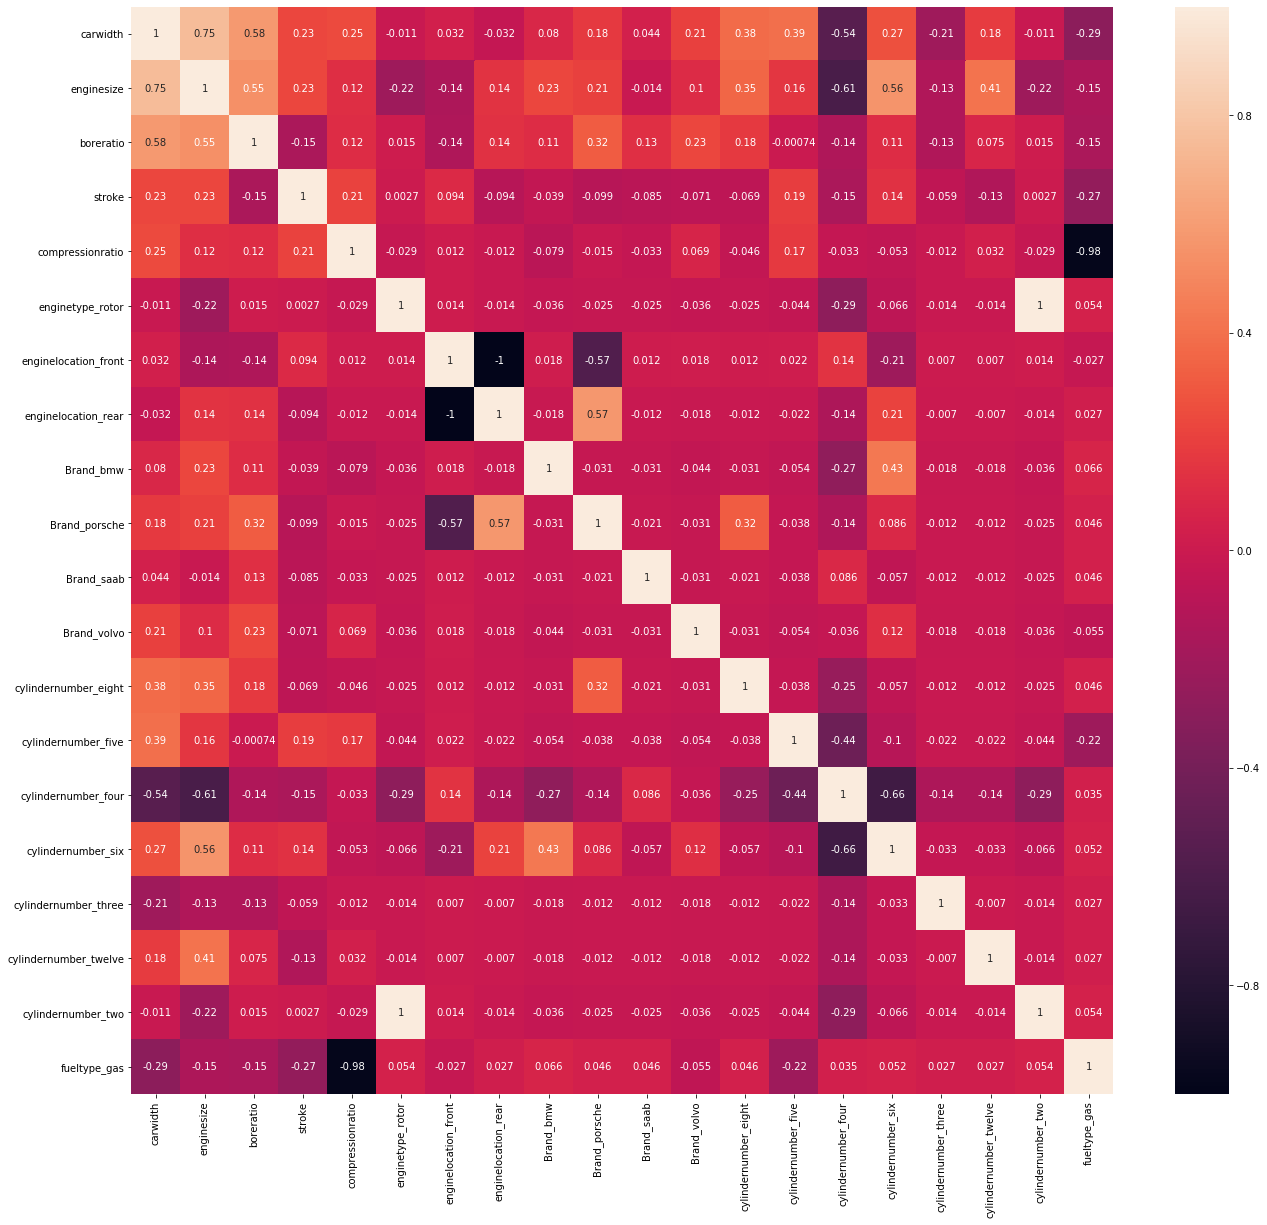

In [34]:

plt.figure(figsize = (22,20))        # Size of the figure
sns.heatmap(X_train_rfe.corr(),annot = True)

#### some of the variables are highly correlated and avaoid keeping high corrleated features together in the model 

In [35]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [37]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.12e-68
Time:                        20:29:47   Log-Likelihood:                 220.55
No. Observations:                 143   AIC:                            -405.1
Df Residuals:                     125   BIC:                            -351.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

#### Check for the VIF values of the feature variables.

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,cylindernumber_six,inf
6,enginetype_rotor,inf
7,enginelocation_front,inf
8,enginelocation_rear,inf
19,cylindernumber_two,inf
18,cylindernumber_twelve,inf
17,cylindernumber_three,inf
13,cylindernumber_eight,inf
14,cylindernumber_five,inf
15,cylindernumber_four,inf


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [39]:
##creating a function to add or delete variable 
## format fun(var) 
X_train_new=X_train_rfe
def fun(var,X_train_new):
    X_train_new=X_train_new.drop([var], axis = 1)
    X_train_lm = sm.add_constant(X_train_new)
    lm = sm.OLS(y_train,X_train_lm).fit()
    print(lm.summary())
    # Checking VIF 
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)   
    return X_train_new

removing ```enginelocation_front``` as it have high correlation with ```enginelocation_rear``` and very high p-value 

In [40]:
X_train_new=fun('enginelocation_front',X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.12e-68
Time:                        20:29:47   Log-Likelihood:                 220.55
No. Observations:                 143   AIC:                            -405.1
Df Residuals:                     125   BIC:                            -351.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [41]:
# removing cylindernumber_eight as it have high p-value      
X_train_new=fun('cylindernumber_eight',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.12e-68
Time:                        20:29:47   Log-Likelihood:                 220.55
No. Observations:                 143   AIC:                            -405.1
Df Residuals:                     125   BIC:                            -351.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [42]:
# removing cylindernumber_six for high p-value      
X_train_new=fun('cylindernumber_six',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.01e-69
Time:                        20:29:47   Log-Likelihood:                 220.51
No. Observations:                 143   AIC:                            -407.0
Df Residuals:                     126   BIC:                            -356.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [43]:
# removing compressionratio for high p valye  
X_train_new=fun('compressionratio',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           4.23e-70
Time:                        20:29:48   Log-Likelihood:                 218.68
No. Observations:                 143   AIC:                            -405.4
Df Residuals:                     127   BIC:                            -358.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

In [44]:
# removing gas as fueltype due to high p value and multicollinearity      
X_train_new=fun('fueltype_gas',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           4.03e-70
Time:                        20:29:48   Log-Likelihood:                 215.92
No. Observations:                 143   AIC:                            -401.8
Df Residuals:                     128   BIC:                            -357.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

In [45]:
# removing enginetype_rotor for inf VIF    
X_train_new=fun('enginetype_rotor',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           4.03e-70
Time:                        20:29:48   Log-Likelihood:                 215.92
No. Observations:                 143   AIC:                            -401.8
Df Residuals:                     128   BIC:                            -357.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

In [46]:
# removing enginesize for high VIF   
X_train_new=fun('enginesize',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     65.26
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.56e-50
Time:                        20:29:48   Log-Likelihood:                 161.74
No. Observations:                 143   AIC:                            -295.5
Df Residuals:                     129   BIC:                            -254.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [47]:
# adding back enginesize as it resulted instability 
X_train_new = pd.concat([X_train_new, X_train['enginesize']], axis = 1)

In [48]:
# removing cylindernumber_four instead 
X_train_new=fun('cylindernumber_four',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.03e-63
Time:                        20:29:48   Log-Likelihood:                 196.64
No. Observations:                 143   AIC:                            -365.3
Df Residuals:                     129   BIC:                            -323.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [49]:
# removing cylindernumber_three   for high p value 
X_train_new=fun('cylindernumber_three',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.74e-63
Time:                        20:29:48   Log-Likelihood:                 193.37
No. Observations:                 143   AIC:                            -360.7
Df Residuals:                     130   BIC:                            -322.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [50]:
# removing cylindernumber_eight     
X_train_new=fun('Brand_saab',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.83e-63
Time:                        20:29:48   Log-Likelihood:                 189.81
No. Observations:                 143   AIC:                            -355.6
Df Residuals:                     131   BIC:                            -320.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [51]:
# removing cylindernumber_12     
X_train_new=fun('cylindernumber_twelve',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.74e-63
Time:                        20:29:49   Log-Likelihood:                 186.49
No. Observations:                 143   AIC:                            -351.0
Df Residuals:                     132   BIC:                            -318.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1046    

In [52]:
X_train_new = pd.concat([X_train_new, X_train['cylindernumber_twelve']], axis = 1)

In [53]:
# removing cylindernumber_eight     
X_train_new=fun('Brand_volvo',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.15e-63
Time:                        20:29:49   Log-Likelihood:                 186.59
No. Observations:                 143   AIC:                            -351.2
Df Residuals:                     132   BIC:                            -318.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [54]:
# removing cylindernumber_eight     
X_train_new=fun('Brand_porsche',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.20e-63
Time:                        20:29:49   Log-Likelihood:                 184.05
No. Observations:                 143   AIC:                            -348.1
Df Residuals:                     133   BIC:                            -318.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [55]:
# removing cylindernumber_five    
X_train_new=fun('cylindernumber_five',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     151.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.85e-63
Time:                        20:29:49   Log-Likelihood:                 181.95
No. Observations:                 143   AIC:                            -345.9
Df Residuals:                     134   BIC:                            -319.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [56]:
# removing cylindernumber_12   
X_train_new=fun('cylindernumber_twelve',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           4.96e-63
Time:                        20:29:49   Log-Likelihood:                 178.57
No. Observations:                 143   AIC:                            -341.1
Df Residuals:                     135   BIC:                            -317.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1316    

In [57]:
# removing stroke 
X_train_new=fun('stroke',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.30e-63
Time:                        20:29:49   Log-Likelihood:                 176.56
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     136   BIC:                            -318.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1763    

In [58]:
# the model is now descent but try removing bore ratio to see if it impproves 
X_train_new=fun('boreratio',X_train_new)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.81e-64
Time:                        20:29:49   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1870    

##### This looks a decent Model with low P value and all VIFs under 5 

###  Residual Analysis of the train data

So, now to check if the error terms are also ** normally distributed ** (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_new).fit()
y_train_price = lr.predict(X_train_new)

Text(0.5, 0, 'Errors')

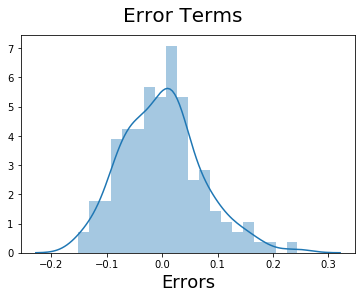

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [61]:
df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,Brand_Nissan,Brand_alfa-romero,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_jaguar,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fueltype_diesel,fueltype_gas
160,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47,7738.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
186,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34,8495.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
59,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32,8845.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
165,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29,9298.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
140,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31,7603.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [62]:
#### Applying the scaling on the test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,Brand_Nissan,Brand_alfa-romero,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_jaguar,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fueltype_diesel,fueltype_gas
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.032258,0.080645,0.338710,0.451613,0.096774,0.032258,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.016129,0.564516,0.419355,0.564516,0.435484,0.822581,0.177419,0.048387,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.967742,0.032258,0.0,0.0,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.032258,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.112903,0.887097
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.178127,0.274512,0.477134,0.501716,0.298064,0.178127,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.127000,0.499868,0.497482,0.499868,0.499868,0.385142,0.385142,0.216335,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.178127,0.178127,0.0,0.0,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.178127,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.319058,0.319058
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000

#### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('price')
X_test = df_test

In [65]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [66]:
collist=X_train_new.columns.tolist()

In [67]:
# Creating X_test_final dataframe by alligning with train 

X_test_final = X_test_m4[collist]

In [68]:
# Making predictions using the fourth model

y_pred_final = lr.predict(X_test_final)

##  Model Evaluation

 - plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

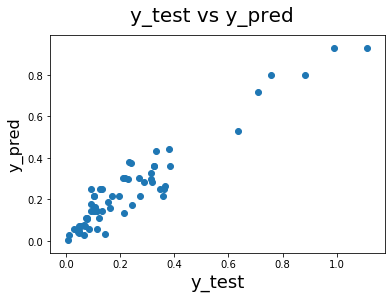

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [70]:
from sklearn.metrics import r2_score
print("Final R-Sqr Value :",r2_score(y_test, y_pred_final))

Final R-Sqr Value : 0.9004517106020921



We can see that the equation of our best fitted line is:

$ price = 0.46  \times  carwidth + 0.44  \times  Rear-engine + 0.245 \times BMWbranded + 0.166 \times rear_cylindered + 0.7878 \times enginesize - 0.1870 $
